<a href="https://colab.research.google.com/github/maggiesam/BEDU-DataScience/blob/main/Machine%20Learning/Equipo_4_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El impacto de la sequía en México - Machine Learning
## BEDU Disruptive Skills - Santander Universidades

### Equipo 4

María Magdalena Castro Sam

Sergio Napoleón Leal

Jesús Omar Magaña Medina

Adrián Ramírez Cortés

Efraín Soto Olmos


## Introducción

La sequía es un fenómeno meteorológico que afecta a los recursos hídricos y por lo tanto tiene consecuencias tanto socioeconómicas y naturales, afectando a la población y los ecosistemas. 

En el presente proyecto se busca explorar los efectos de la sequía en el ámbito agrícola a través de técnicas de machine learning. Esto gracias a los proyectos previos que han permitido obtener información y análizar la información disponible.

Este proyecto utilizó datasets previamente procesados. Se realizó una librería llamada MLUtilities.py con el fin de facilitar el uso de las librerías de machine leaning utilizadas. Adicionalmente se realizó una bitácora de experimentos que ayudó a mantener un registro de lo que se realizó.

La librería MLUtilities.py se puede ver [aquí](https://github.com/maggiesam/BEDU-DataScience/blob/main/MLUtilities.py).

La bitácora se puede ver [aquí](https://github.com/maggiesam/BEDU-DataScience/blob/main/Bitacora.md).

## Algoritmos no supervisados - KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Se utilizaron los datos del archivo dataframe-junto.csv guardado en nuestro [repositorio](https://github.com/maggiesam/BEDU-DataScience/blob/main/Datasets/dataframe-junto.csv), este data frame contiene todos los datos que hemos recopilado para este proyecto

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/Datasets/dataframe-junto.csv', index_col=0)
data.head()

,ENTIDAD,Mes,Año,Tipo_sequia,Precipitacion,Temperatura_promedio,Temperatura_maxima,Temperatura_minima,Sembrada_ha,Cosechada_ha,perdida_ha,producto
0,Aguascalientes,1,2005,NPS,0.0,12.699696,22.643727,2.755665,47286,43031,4255,maiz
1,Aguascalientes,1,2005,NPS,0.0,12.699696,22.643727,2.755665,11950,10570,1380,frijol
2,Aguascalientes,1,2006,D0,4.8,13.128922,24.114734,2.143109,39600,17684,21916,maiz
3,Aguascalientes,1,2006,D0,4.8,13.128922,24.114734,2.143109,10819,6602,4217,frijol
4,Aguascalientes,1,2007,NPS,17.2,13.320241,21.932079,4.860635,37727,31610,6117,maiz


Damos un vistazo a la estructura de nuestra dataframe

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12088 entries, 0 to 12087
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENTIDAD               12088 non-null  object 
 1   Mes                   12088 non-null  int64  
 2   Año                   12088 non-null  int64  
 3   Tipo_sequia           12088 non-null  object 
 4   Precipitacion         12088 non-null  float64
 5   Temperatura_promedio  12088 non-null  float64
 6   Temperatura_maxima    12088 non-null  float64
 7   Temperatura_minima    12088 non-null  float64
 8   Sembrada_ha           12088 non-null  int64  
 9   Cosechada_ha          12088 non-null  int64  
 10  perdida_ha            12088 non-null  int64  
 11  producto              12088 non-null  object 
dtypes: float64(4), int64(5), object(3)
memory usage: 1.2+ MB


Creamos una copia de nuestros datos

In [ ]:
df = data.copy() 

Reemplazamos los datos que contienen datos de tipo cadena por datos numericos

In [ ]:
mapping = {'NPS':-1, 'D0':0, 'D1':1, 'D2':2, 'D3':3, 'D4':4}
df['Tipo_sequia'] = df['Tipo_sequia'].map(mapping)

mapping = {'maiz':1, 'frijol':2, 'trigo':3}
df['producto'] = df['producto'].map(mapping)

Verificamos que los datos esten bien

In [ ]:
df.head()

,ENTIDAD,Mes,Año,Tipo_sequia,Precipitacion,Temperatura_promedio,Temperatura_maxima,Temperatura_minima,Sembrada_ha,Cosechada_ha,perdida_ha,producto
0,Aguascalientes,1,2005,-1,0.0,12.699696,22.643727,2.755665,47286,43031,4255,1
1,Aguascalientes,1,2005,-1,0.0,12.699696,22.643727,2.755665,11950,10570,1380,2
2,Aguascalientes,1,2006,0,4.8,13.128922,24.114734,2.143109,39600,17684,21916,1
3,Aguascalientes,1,2006,0,4.8,13.128922,24.114734,2.143109,10819,6602,4217,2
4,Aguascalientes,1,2007,-1,17.2,13.320241,21.932079,4.860635,37727,31610,6117,1


Escalamos nuestros para que no existan diferencias entre ellos

In [ ]:
std_scaler = StandardScaler()
data_cluster = df.iloc[:,3:]
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)

Verificamos el resultado

In [ ]:
data_cluster.head()

,Tipo_sequia,Precipitacion,Temperatura_promedio,Temperatura_maxima,Temperatura_minima,Sembrada_ha,Cosechada_ha,perdida_ha,producto
0,-0.628916,-0.820044,-1.830640,-1.446769,-2.010085,-0.054079,0.182410,-0.263735,-1.083748
1,-0.628916,-0.820044,-1.830640,-1.446769,-2.010085,-0.350458,-0.230729,-0.300224,0.247318
2,0.418959,-0.772973,-1.744545,-1.107579,-2.112740,-0.118545,-0.140187,-0.039584,-1.083748
3,0.418959,-0.772973,-1.744545,-1.107579,-2.112740,-0.359944,-0.281230,-0.264217,0.247318
4,-0.628916,-0.651373,-1.706169,-1.610863,-1.657325,-0.134254,0.037053,-0.240102,-1.083748


Reducimos a dos dimensiones nuestros data frame con originalmente 9 dimensiones

In [ ]:
pca_2 = PCA(2)
pca_2_resultados = pca_2.fit_transform(data_cluster)

Vemos cual es el valor de varianza acumulada

In [ ]:
print("Varianza acumulada explicada por mis dos nuevas variables: {:.2%}".format(np.sum(pca_2.explained_variance_ratio_)))

Varianza acumulada explicada por mis dos nuevas variables: 61.44%


Graficamos nuestros nuevos datos

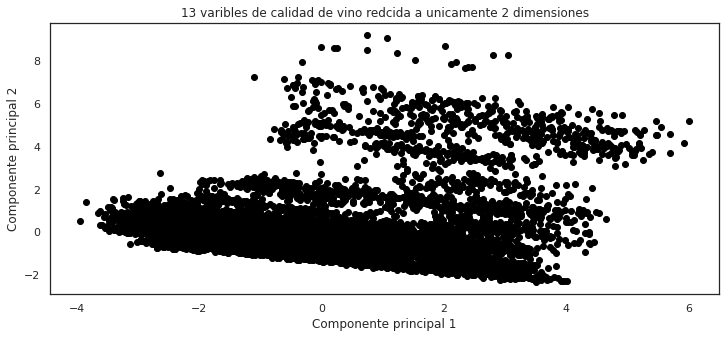

In [ ]:
sns.set(style="white", rc={"figure.figsize":(12,5)})

plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], color='black')
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("13 varibles de calidad de vino redcida a unicamente 2 dimensiones")

plt.show()

Mediante un for hacemos pruebas con diferentes numero de cluster para el algoritmo K-means

In [ ]:
inertia = []
for i in range(1,10):
  kmeans = cluster.KMeans(n_clusters=i, init="k-means++", random_state=18)
  kmeans.fit(data_cluster)
  inertia.append(kmeans.inertia_)

De igual manera hacemos pruebas de diferente numero de cluster para K-means pero ahora usando el metodo de la silueta

In [ ]:
silhouette = {}
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++', n_init=15, max_iter=500,random_state=18)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')

Graficos los resultados del metodo del codo y silueta para elegir el valor optimo de k.
Como vemos el valor optimo para este caso es 4

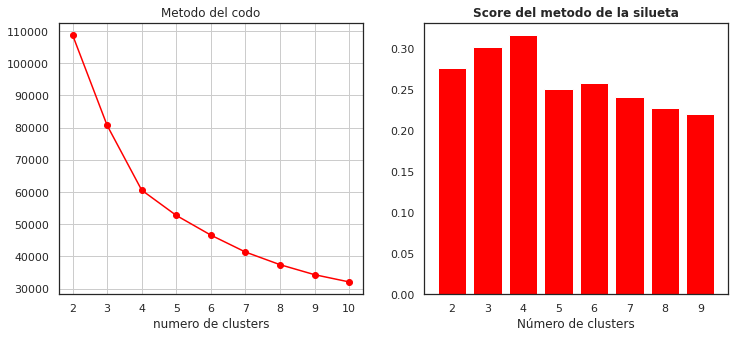

In [ ]:
# Vamos a graficar el metodo del codo y su complementario
sns.set(style="white", rc={"figure.figsize":(12,5)})
plt.subplot(1,2,1)

plt.plot(range(2,len(inertia)+2), inertia, marker="o", color ="red")
plt.xlabel("numero de clusters")
plt.title("Metodo del codo")
plt.grid(True)

plt.subplot(1,2,2)


plt.bar(range(len(silhouette)), list(silhouette.values()), align ="center", color ="red")
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.title("Score del metodo de la silueta", fontweight = "bold")
plt.xlabel("Número de clusters")

plt.show()
# Elegimos la barra mas grande en la silueta y el punto donde se separa poco en el metodo del codo
# en este caso el mejor numero de cluster es 3

Ya que tengamos el valor de k, usamos el algoritmo K-means con 4 cluster y lo alimentamos con los datos. De esta manera calculamos los centroides

In [ ]:
kmeans = cluster.KMeans(n_clusters=4, random_state=84, init="k-means++")
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroids)

Graficamos nuestros datos y Centroides calculados por K-means

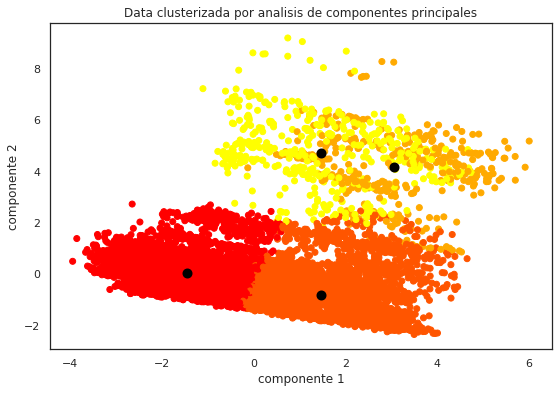

In [ ]:
sns.set(style="white", rc={"figure.figsize":(9,6)})

plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], c=kmeans_labels, cmap="autumn")
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker='o', color="black", linewidths=4, zorder=10)
plt.title("Data clusterizada por analisis de componentes principales")
plt.xlabel("componente 1")
plt.ylabel("componente 2")

plt.show()

## Regresión lineal

Buscamos poder predecir el porcentaje de siembra cosechado, utilizando las variables meteorológicas de temperatura y precipitación, así como la cantidad de hectáreas sembradas

Para eso cargamos el archivo MLUtilities.py como libreria de nuestro repositorio

In [ ]:
!wget "https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/MLUtilities.py"

--2021-10-17 22:27:03--  https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/MLUtilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6652 (6.5K) [text/plain]
Saving to: ‘MLUtilities.py’

MLUtilities.py      100%[===================>]   6.50K  --.-KB/s    in 0s      

2021-10-17 22:27:03 (60.8 MB/s) - ‘MLUtilities.py’ saved [6652/6652]



In [ ]:
import MLUtilities as mlu

El modelo se realiza para cada planta por separado, y los resultados de los experimentos expuestos en la bitácora, muestran que cada una tiene un modelo distinto. \\
Los modelos se separan por grados y ademas la opción de hacer el modelo por meses o todos los datos en conjunto.


Para el caso del maiz, se ve que el mejor modelo para la predicción es separar los datos por meses y utilizar una regresión de grado 2

In [ ]:
mlu.regresion_lineal(planta=0, grado=2, meses=True)

función de regresion polinomica de grado 2 de maiz
Entrenamiento: MSE =613.6261702756863
Pruebas: MSE =613.1658306750875


/content/MLUtilities.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto["porcentaje"] = producto["Cosechada_ha"]*100/producto["Sembrada_ha"]


,valor_real,prediccion
0,96.284784,86.514541
1,93.849796,61.488372
2,42.140983,63.063449
3,65.864263,53.798631
4,28.989172,76.077810
...,...,...
105,42.947461,66.659700
106,77.995529,69.473012
107,70.905707,79.647885
108,12.376238,63.607983


Para el caso del frijol, el mejor modelo para la predicción es el modelo sin separación por meses y de grado 2

In [ ]:
mlu.regresion_lineal(planta=1, grado=3, meses=False)

función de regresion polinomica de grado 3 de frijol
Entrenamiento: MSE =1054.3071924551366
Pruebas: MSE =1053.832373738116


/content/MLUtilities.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto["porcentaje"] = producto["Cosechada_ha"]*100/producto["Sembrada_ha"]


,valor_real,prediccion
0,99.716228,138.572357
1,39.293428,68.172325
2,99.693179,68.101161
3,6.930923,62.359138
4,72.380952,71.703757
...,...,...
965,0.486631,14.041122
966,24.224850,38.817552
967,47.104946,71.459087
968,100.000000,73.613714


Para el caso del trigo, el mejor modelo para la predicción es el modelo de grado 1 con separación por meses

In [ ]:
mlu.regresion_lineal(planta=2, grado=1, meses=True)

función de regresion lineal de trigo
Entrenamiento: MSE =557.434026049089
Pruebas: MSE =855.016977392184


/content/MLUtilities.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto["porcentaje"] = producto["Cosechada_ha"]*100/producto["Sembrada_ha"]


,valor_real,prediccion
0,5.725971,82.251943
1,90.693196,87.186435
2,100.000000,85.439683
3,24.429260,85.979821
4,23.586957,80.740415
5,100.000000,84.760120
6,100.000000,89.651367
7,79.865772,82.890734
8,100.000000,83.167977
9,100.000000,88.755305


A pesar de que los modelos si mejoran dadas ciertas circunstancias, siguen siendo muy malos para la predicción, en donde la mayoría predice erróneamente por mucho un valor bajo en el porcentaje de cosecha. \\
Ademas de que un análisis en conjunto seria muy difícil, ya que cada planta presenta un grado de regresión distinto, por lo que al menos con nuestra aproximación al problema, no se esperan resultados exitosos en la predicción por modelo lineal.
